In [1]:
import tensorflow as tf
print("Version of tensorflow is : ",tf.__version__)

Version of tensorflow is :  2.1.0


In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
from tensorflow.keras.datasets import mnist
(train_data , train_label) , (test_data , test_label) = mnist.load_data()

In [3]:
print("Details of Training Data :\n==============================")
print("Shape of train_data : ",train_data.shape)
print("Shape of train_label : ",train_label.shape)
print("Details of Testing Data :\n==============================")
print("Shape of test_data : ",test_data.shape)
print("Shape of test_label : ",test_label.shape)

Details of Training Data :
Shape of train_data :  (60000, 28, 28)
Shape of train_label :  (60000,)
Details of Testing Data :
Shape of test_data :  (10000, 28, 28)
Shape of test_label :  (10000,)


In [4]:
train_data = train_data.reshape((60000 , 28 , 28 , 1))
train_data = train_data / 255.0
test_data  = test_data.reshape((10000 , 28 , 28 , 1))
test_data  = test_data / 255.0

In [9]:
train_label = tf.keras.utils.to_categorical(train_label)
test_label  = tf.keras.utils.to_categorical(test_label )

In [10]:
print("Details of Training Data :\n==============================")
print("Shape of train_data : ",train_data.shape)
print("Shape of train_label : ",train_label.shape)
print("Details of Testing Data :\n==============================")
print("Shape of test_data : ",test_data.shape)
print("Shape of test_label : ",test_label.shape)

Details of Training Data :
Shape of train_data :  (60000, 28, 28, 1)
Shape of train_label :  (60000, 10)
Details of Testing Data :
Shape of test_data :  (10000, 28, 28, 1)
Shape of test_label :  (10000, 10)


Text(0.5, 1.0, '5')

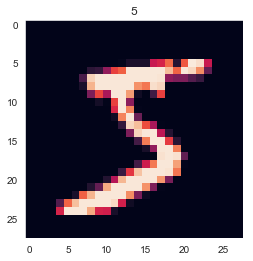

In [8]:
plt.imshow(train_data[0].reshape((28,28)))
plt.grid(False)
plt.title(train_label[0])

In [13]:
X_train = train_data[:50000 , : , : , :]
X_test  = train_data[50000: , : , : , :]
y_train = train_label[:50000 , :]
y_test  = train_label[50000: , :]

In [14]:
print("Details of Training Data :\n==============================")
print("Shape of X_train : ",X_train.shape)
print("Shape of y_train : ",y_train.shape)
print("Details of Validation Data :\n==============================")
print("Shape of X_test : ",X_test.shape)
print("Shape of y_test : ",y_test.shape)

Details of Training Data :
Shape of X_train :  (50000, 28, 28, 1)
Shape of y_train :  (50000, 10)
Details of Validation Data :
Shape of X_test :  (10000, 28, 28, 1)
Shape of y_test :  (10000, 10)


In [11]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64 , (3,3) , activation = "relu" , input_shape = (28,28,1)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(64 , (3,3) , activation = "relu"))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(64 , (3,3) , activation = "relu"))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation = "relu"))
model.add(tf.keras.layers.Dense(10 , activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [16]:
model.compile(optimizer = "rmsprop" , loss = tf.keras.losses.categorical_crossentropy , metrics = ['acc'])

In [17]:
his1 = model.fit(X_train , y_train , epochs = 5 , batch_size = 64 , validation_data = (X_test , y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 87s 2ms/sample - loss: 0.2569 - acc: 0.9205 - val_loss: 0.0918 - val_acc: 0.9731
Epoch 2/5
50000/50000 [==============================] - 87s 2ms/sample - loss: 0.0793 - acc: 0.9753 - val_loss: 0.0669 - val_acc: 0.9821
Epoch 3/5
50000/50000 [==============================] - 85s 2ms/sample - loss: 0.0556 - acc: 0.9826 - val_loss: 0.0526 - val_acc: 0.9849
Epoch 4/5
50000/50000 [==============================] - 85s 2ms/sample - loss: 0.0420 - acc: 0.9871 - val_loss: 0.0484 - val_acc: 0.9864
Epoch 5/5
50000/50000 [==============================] - 86s 2ms/sample - loss: 0.0338 - acc: 0.9896 - val_loss: 0.0439 - val_acc: 0.9887


In [19]:
acc = model.evaluate(test_data , test_label)

10000/10000 [==============================] - 5s 479us/sample - loss: 0.0444 - acc: 0.9883


In [21]:
print("Acc for test data : %.3f%%"%(acc[1] * 100))

Acc for test data : 98.830%


In [26]:
def pred(a , i):
    pred = model.predict(test_data[i : i + 1]).argmax()
    a.imshow(test_data[i].reshape((28 , 28)))
    a.grid(False)
    a.set_title("Predicted Digit  : %d || Originl Digit  : %d"%(pred , test_label[i].argmax()))

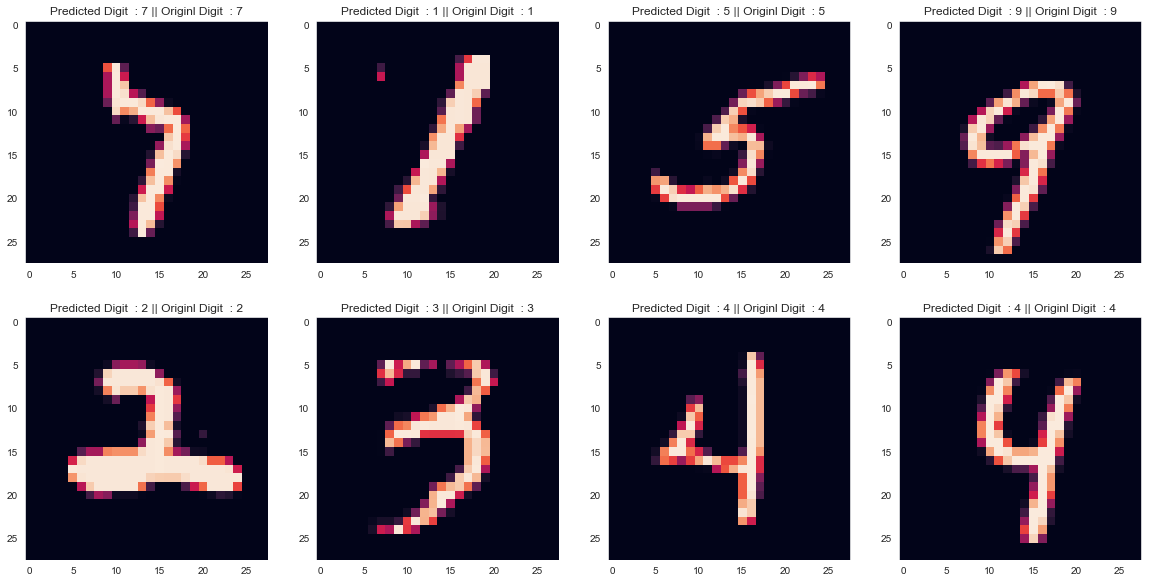

In [27]:
import random
_ , ax = plt.subplots(2 , 4 , figsize = (20 , 10))
for i in range(8):
    ind = random.randint(0,10000)
    pred(ax[i//4 , i % 4] , ind)
    